In [56]:
 # Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import requests
from scipy import stats
import numpy as np

In [57]:
#Import file
fuel_cost = pd.read_csv('Resources/database.csv', low_memory=False)
fuel_cost.head()

,Vehicle ID,Year,Make,Model,Class,Drive,Transmission,Transmission Descriptor,Engine Index,Engine Descriptor,...,Hours to Charge (AC 240V),Composite City MPG,Composite Highway MPG,Composite Combined MPG,Range (FT1),City Range (FT1),Highway Range (FT1),Range (FT2),City Range (FT2),Highway Range (FT2)
0,26587,1984,Alfa Romeo,GT V6 2.5,Minicompact Cars,NaN,Manual 5-Speed,NaN,9001,(FFS),...,0.0,0,0,0,0,0.0,0.0,NaN,0.0,0.0
1,27705,1984,Alfa Romeo,GT V6 2.5,Minicompact Cars,NaN,Manual 5-Speed,NaN,9005,(FFS) CA model,...,0.0,0,0,0,0,0.0,0.0,NaN,0.0,0.0
2,26561,1984,Alfa Romeo,Spider Veloce 2000,Two Seaters,NaN,Manual 5-Speed,NaN,9002,(FFS),...,0.0,0,0,0,0,0.0,0.0,NaN,0.0,0.0
3,27681,1984,Alfa Romeo,Spider Veloce 2000,Two Seaters,NaN,Manual 5-Speed,NaN,9006,(FFS) CA model,...,0.0,0,0,0,0,0.0,0.0,NaN,0.0,0.0
4,27550,1984,AM General,DJ Po Vehicle 2WD,Special Purpose Vehicle 2WD,2-Wheel Drive,Automatic 3-Speed,NaN,1830,(FFS),...,0.0,0,0,0,0,0.0,0.0,NaN,0.0,0.0


In [58]:
fuel_cost.columns

Index(['Vehicle ID', 'Year', 'Make', 'Model', 'Class', 'Drive', 'Transmission',
       'Transmission Descriptor', 'Engine Index', 'Engine Descriptor',
       'Engine Cylinders', 'Engine Displacement', 'Turbocharger',
       'Supercharger', 'Fuel Type', 'Fuel Type 1', 'Fuel Type 2',
       'City MPG (FT1)', 'Unrounded City MPG (FT1)', 'City MPG (FT2)',
       'Unrounded City MPG (FT2)', 'City Gasoline Consumption (CD)',
       'City Electricity Consumption', 'City Utility Factor',
       'Highway MPG (FT1)', 'Unrounded Highway MPG (FT1)', 'Highway MPG (FT2)',
       'Unrounded Highway MPG (FT2)', 'Highway Gasoline Consumption (CD)',
       'Highway Electricity Consumption', 'Highway Utility Factor',
       'Unadjusted City MPG (FT1)', 'Unadjusted Highway MPG (FT1)',
       'Unadjusted City MPG (FT2)', 'Unadjusted Highway MPG (FT2)',
       'Combined MPG (FT1)', 'Unrounded Combined MPG (FT1)',
       'Combined MPG (FT2)', 'Unrounded Combined MPG (FT2)',
       'Combined Electricity Consu

In [67]:
#Extract columns
cleaned_data = fuel_cost[['Year', 'Annual Fuel Cost (FT1)']]
cleaned_data

,Year,Annual Fuel Cost (FT1)
0,1984,1750
1,1984,1750
2,1984,1650
3,1984,1650
4,1984,2050
...,...,...
38108,2017,1350
38109,2017,1900
38110,2017,1850
38111,2017,1700


Text(0.5, 1.0, 'Average Annual Fuel Cost from 1984 - 2017')

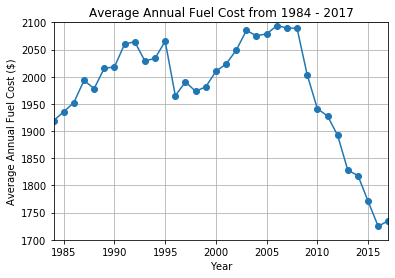

In [93]:
# year = fuel_cost.loc[fuel_cost['Year']]
#year_df = cleaned_data.groupby('Year').unique()
years = [1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
        2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017]
# year = year_df['Year']
# print(len(year))
# print(year)
cost = fuel_cost.groupby('Year').mean()['Annual Fuel Cost (FT1)']
# print(len(cost))
# print(cost)
# print(cost.min())

# plt.figure(figsize=(12,8), dpi= 100, facecolor="w", edgecolor="k")
plt.plot(years, cost, marker='o')
# plt.xticks(nparrage)
plt.xlim(1984,2017)
plt.ylim(1700,2100)
plt.grid('True')
#plt.tick_params
#Figure out how to add more values along x axis label 

# Labels
plt.xlabel("Year")
plt.ylabel("Average Annual Fuel Cost ($)")
plt.title("Average Annual Fuel Cost from 1984 - 2017")

Text(0.5, 1.0, 'Average Annual MPG from 1984 - 2017')

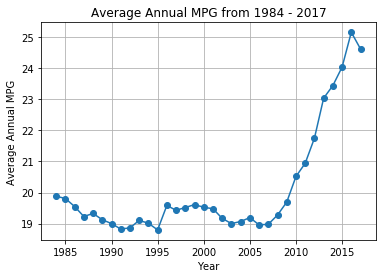

In [94]:
#Define new MPG variable
mpg = fuel_cost.groupby('Year').mean()['Combined MPG (FT1)']

#Plot MPG over time
# plt.figure(figsize=(12,8), dpi= 100, facecolor="w", edgecolor="k")
plt.plot(years, mpg, marker='o')
# plt.xlim(1984,2017)
# plt.ylim(1700,2100)
plt.grid('True')
#Figure out how to add more values along x axis label 

# Labels
plt.xlabel("Year")
plt.ylabel("Average Annual MPG")
plt.title("Average Annual MPG from 1984 - 2017")

In [96]:
# Is there a way to stack graphs better?
# plt.plot(years, cost, marker='o', color="green")
# plt.plot(years, mpg, marker='o', color="blue")